In [1]:
# importar modulos / bibliotecas de funcion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
rutaArchivo = 'C:/Users/axelg/OneDrive/Documentos/cmder/Untitled Folder/Mall_Customers-2.csv'

In [7]:
#index_col = id como principal
data = pd.read_csv(rutaArchivo, index_col=0)
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
data.describe

<bound method NDFrame.describe of             Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]>

In [11]:
# Distribucion de cada clase
data.groupby('Gender').size()

Gender
Female    112
Male       88
dtype: int64

In [12]:
# Separacion de los datos
train, test = train_test_split(data, test_size = 0.4, stratify = data['Gender'], random_state = 42)
train.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
39,Female,36,37,26
55,Female,50,43,45
93,Male,48,60,49
183,Male,46,98,15
143,Female,28,76,40


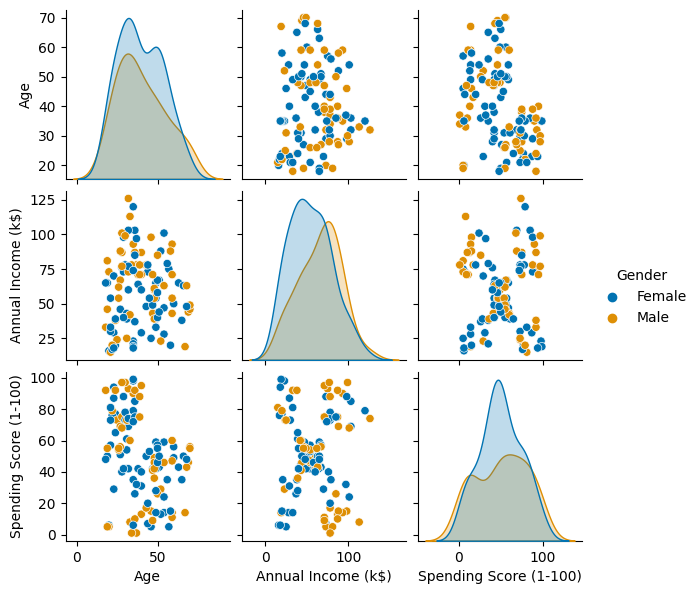

In [13]:
# Diagrama de disperision de los atributos emparejados
sns.pairplot(train, hue='Gender', height=2, palette='colorblind');

# Separacion de la etiqyeta de clase y atributos

In [15]:
# Separacion objetivo - explicativas de cada grupo 
x_train = train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y_train = train['Gender']
# grupo de pruebas
x_test = train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y_test = train['Gender']
# Mostrar los primeros valores
print(x_train.head(5))
print(y_train.head(5))

            Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                 
39           36                  37                      26
55           50                  43                      45
93           48                  60                      49
183          46                  98                      15
143          28                  76                      40
CustomerID
39     Female
55     Female
93       Male
183      Male
143    Female
Name: Gender, dtype: object


# Arbol de decision (clasificacion)

In [16]:
# Creacion del modelo del arbol de decision
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(x_train, y_train)
prediccion = mod_dt.predict(x_test)

In [18]:
# Modulos para metricas de eficiencia del modelo
from sklearn import metrics

In [19]:
# Verificacion de la precision del arbol
print("La prediccion del arbol de decisiones es: {:.3f}".format(metrics.accuracy_score(prediccion, y_test)))

La prediccion del arbol de decisiones es: 0.725


In [20]:
importancia_dt = pd.DataFrame({'Caracteristica':mod_dt.feature_names_in_,
                           'Importancia':mod_dt.feature_importances_})
importancia_dt

,Caracteristica,Importancia
0,Age,0.211679
1,Annual Income (k$),0.274800
2,Spending Score (1-100),0.513521


# Visualizacion del arbol de decision

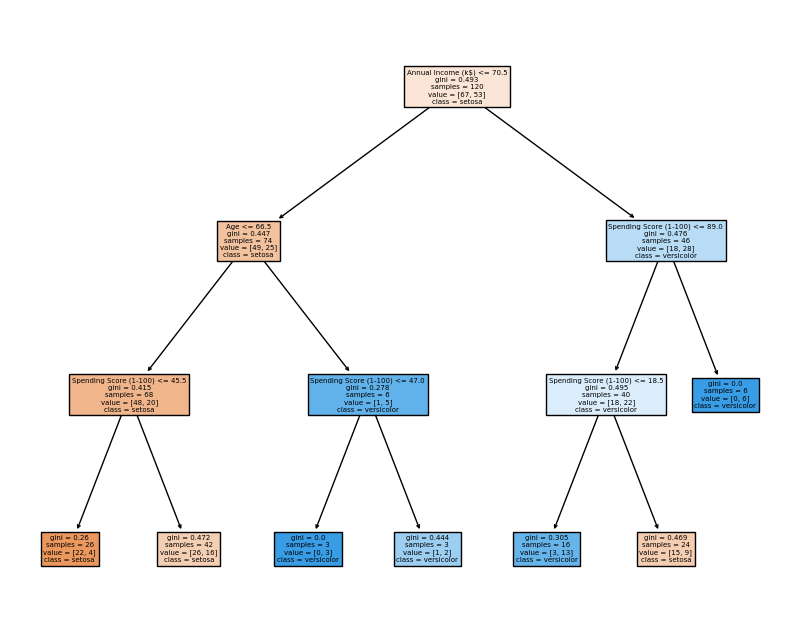

In [21]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt, feature_names=mod_dt.feature_names_in_, class_names=['setosa','versicolor','virginica'], filled=True);